In [1]:
from bayes import *
import pandas as pd
import numpy as np

In [2]:
termo = pd.read_excel('EXCEL TERMO 2.xlsx')

In [3]:
#termo = termo.drop(['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'],axis=1)

In [4]:
cross = pd.crosstab(termo['MUESTRA'],termo['EXITOS'])

In [5]:
# los datos son conocidos: impresiones, conversiones, control y test
imps_ctrl, convs_ctrl= 26, 13
imps_test, convs_test= 21, 19

CR_ctrl=convs_ctrl/imps_ctrl
CR_test=convs_test/imps_test

print ('Tasas', CR_ctrl, CR_test)

Tasas 0.5 0.9047619047619048


In [6]:
# se crean funciones beta
# aprioris

a_C, b_C = convs_ctrl+1, imps_ctrl-convs_ctrl+1
a_T, b_T = convs_test+1, imps_test-convs_test+1

beta_C=beta(a_C, b_C)  # control
beta_T=beta(a_T, b_T)  # test

In [7]:
# diferencia normalizada de las medias de test y control

salto=(beta_T.mean()-beta_C.mean())/beta_C.mean()
salto

0.7391304347826086

In [8]:
prob=calc_prob(beta_T, beta_C)  # esta funcion es la clave

prob

0.9984979729974328

In [12]:
print (
'''El test reduce el tiempo de compra en un {:2.2f}%,
con una probabilidad del {:2.2f}%'''
    .format(salto*100, prob*100)nb 
)

El test reduce el tiempo de compra en un 73.91%,
con una probabilidad del 99.85%


0.5 0.9047619047619048


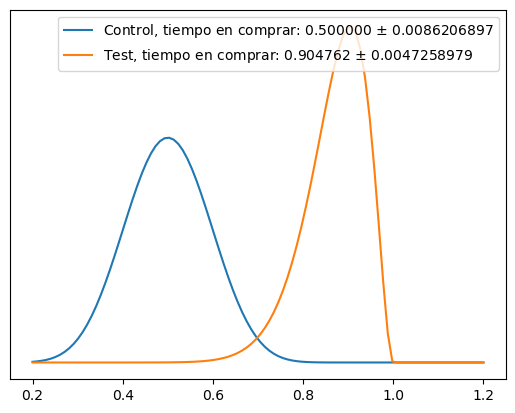

In [10]:
print (CR_ctrl, CR_test)
plot([beta_C, beta_T], ['Control', 'Test'],linf = 0.2, lsup=1.2)